# **Course**: Deep Learning

[<img align="right" width="400" height="100" src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg">](https://www.tu-braunschweig.de/en/)

[Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) \([m.maboudi@tu-bs.de](m.maboudi@tu-bs.de)) and [Pedro Achanccaray](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz) (p.diaz@tu-bs.de)

[Technical University of Braunschweig](https://www.tu-braunschweig.de/en/)

[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/igp)

# **Lab 10:** Generative AI

In this lab session we will work with two generative models:
- Variational AutoEncoder (VAE)
- Generative Adversarial Networks (GANs)
  - GANs
  - cGANs
  - pix2pix (Imate-to-Image translation)



## **Mount Google Drive to Google Colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Change **this path** to the **path of a folder** in your Google Drive to storage the files associated to this session (trained model, figures for visualization, etc.)

In [2]:
# %cd drive/MyDrive/PATH/TO/YOUR/FOLDER
%cd drive/MyDrive/Colabs/DeepLearning_course/Lab_10/

/content/drive/MyDrive/Colabs/DeepLearning_course/Lab_10


## **Load packages**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.callbacks import ModelCheckpoint, \
                                       EarlyStopping
import random
import os

from importlib import reload
import models_ae
import models_vae
import models_gan
import models_cgans
import models_pix2pix

reload(models_ae)
reload(models_vae)
reload(models_gan)
reload(models_cgans)
reload(models_pix2pix)

from models_ae import *
from models_vae import *
from models_gan import *
from models_cgans import *
from models_pix2pix import *

# **AutoEncoders (AE)**

All AE implementations are in the `models_ae.py` file.

## **Simple AE**

AE with 1 input layer, 1 hidden layer (dense), and 1 output layer.

### **Load data**

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### **Model**

In [ ]:
encoding_dim = 32

autoencoder = get_ae(encoding_dim)

autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 32)                25120     
                                                                 
 dense_11 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Train**

In [ ]:
autosave = ModelCheckpoint("autoencoder.h5",
                           mode="min",
                           save_best_only=True,
                           monitor="val_loss",
                           verbose=1)

early_stop = EarlyStopping(patience=10,
                           verbose=1,
                           mode="min",
                           monitor="val_loss",
                           restore_best_weights=True)

In [ ]:
autoencoder.fit(x_train,
                x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test),
                callbacks=[autosave, early_stop])

Epoch 1/50
230/235 [============================>.] - ETA: 0s - loss: 0.2772
Epoch 1: val_loss improved from inf to 0.18678, saving model to autoencoder.h5
235/235 [==============================] - 2s 8ms/step - loss: 0.2756 - val_loss: 0.1868
Epoch 2/50
 49/235 [=====>........................] - ETA: 0s - loss: 0.1831

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


227/235 [===========================>..] - ETA: 0s - loss: 0.1698
Epoch 2: val_loss improved from 0.18678 to 0.15276, saving model to autoencoder.h5
235/235 [==============================] - 1s 4ms/step - loss: 0.1693 - val_loss: 0.1528
Epoch 3/50
226/235 [===========================>..] - ETA: 0s - loss: 0.1443
Epoch 3: val_loss improved from 0.15276 to 0.13375, saving model to autoencoder.h5
235/235 [==============================] - 1s 6ms/step - loss: 0.1440 - val_loss: 0.1338
Epoch 4/50
232/235 [============================>.] - ETA: 0s - loss: 0.1287
Epoch 4: val_loss improved from 0.13375 to 0.12165, saving model to autoencoder.h5
235/235 [==============================] - 1s 4ms/step - loss: 0.1287 - val_loss: 0.1216
Epoch 5/50
232/235 [============================>.] - ETA: 0s - loss: 0.1187
Epoch 5: val_loss improved from 0.12165 to 0.11367, saving model to autoencoder.h5
235/235 [==============================] - 1s 5ms/step - loss: 0.1187 - val_loss: 0.1137
Epoch 6/50
225/

### **Prediction**

313/313 [==============================] - 1s 2ms/step


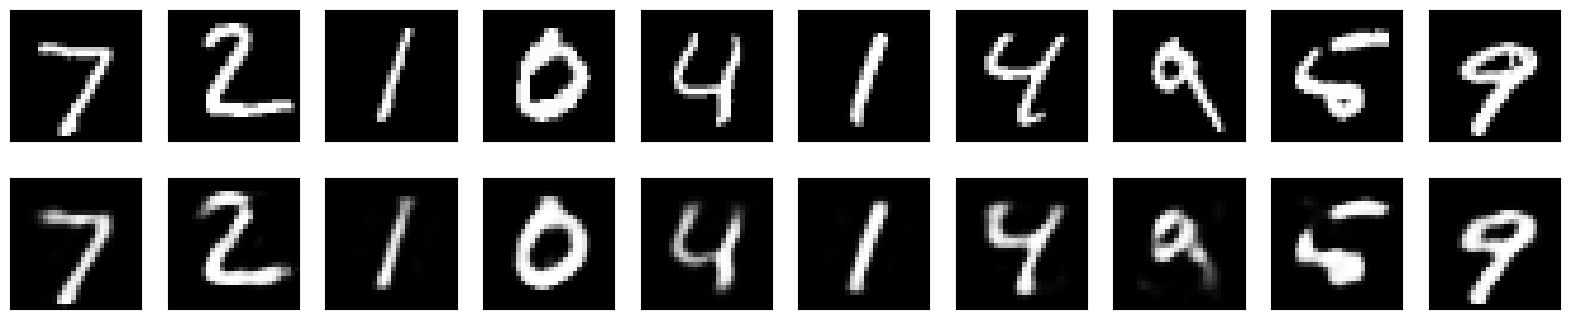

In [ ]:
# autoencoder.load_weights("autoencoder.h5")
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **Deep AE**

AE with 1 input layer, 5 hidden layers (dense), and 1 output layer.

### **Load data**

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### **Model**

In [ ]:
autoencoder_deep = get_deep_ae()

autoencoder_deep.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 784)               1011

### **Train**

In [ ]:
autosave = ModelCheckpoint("autoencoder_deep.h5",
                           mode="min",
                           save_best_only=True,
                           monitor="val_loss",
                           verbose=1)

early_stop = EarlyStopping(patience=10,
                           verbose=1,
                           mode="min",
                           monitor="val_loss",
                           restore_best_weights=True)

In [ ]:
autoencoder_deep.fit(x_train,
                     x_train,
                     epochs=100,
                     batch_size=256,
                     shuffle=True,
                     validation_data=(x_test,x_test),
                     callbacks=[autosave, early_stop])

Epoch 1/100
235/235 [==============================] - ETA: 0s - loss: 0.2426
Epoch 1: val_loss improved from inf to 0.16488, saving model to autoencoder_deep.h5
235/235 [==============================] - 4s 11ms/step - loss: 0.2426 - val_loss: 0.1649
Epoch 2/100
227/235 [===========================>..] - ETA: 0s - loss: 0.1483
Epoch 2: val_loss improved from 0.16488 to 0.13582, saving model to autoencoder_deep.h5
235/235 [==============================] - 2s 8ms/step - loss: 0.1479 - val_loss: 0.1358
Epoch 3/100
233/235 [============================>.] - ETA: 0s - loss: 0.1317
Epoch 3: val_loss improved from 0.13582 to 0.12454, saving model to autoencoder_deep.h5
235/235 [==============================] - 2s 8ms/step - loss: 0.1316 - val_loss: 0.1245
Epoch 4/100
231/235 [============================>.] - ETA: 0s - loss: 0.1227
Epoch 4: val_loss improved from 0.12454 to 0.11818, saving model to autoencoder_deep.h5
235/235 [==============================] - 1s 5ms/step - loss: 0.1227 - 

### **Prediction**

313/313 [==============================] - 1s 2ms/step


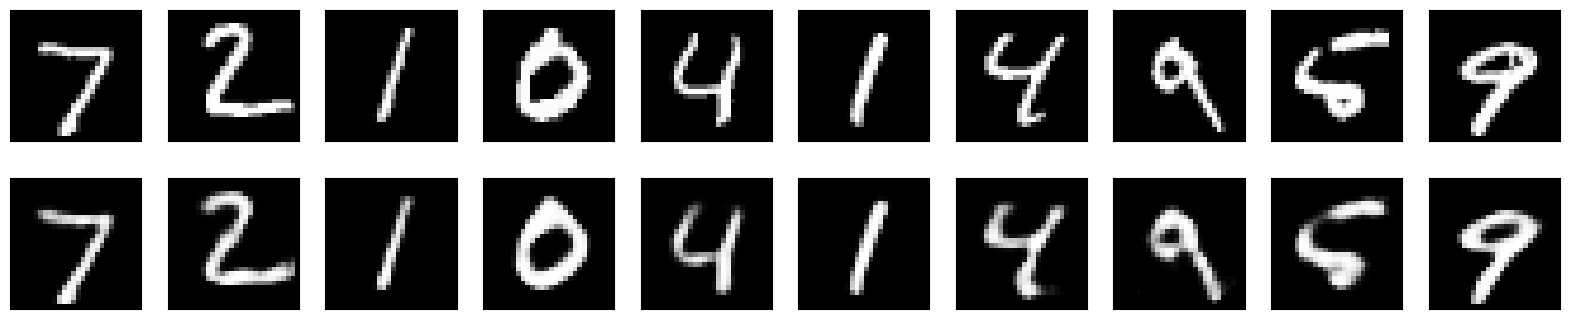

In [ ]:
# autoencoder_deep.load_weights("autoencoder_deep.h5")
predictions = autoencoder_deep.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **Convolutional AE**

AE with convolutional layers in the encoder and decoder.

### **Load data**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### **Model**

In [ ]:
autoencoder_conv = get_conv_ae()

autoencoder_conv.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 7, 7, 8)           584 

### **Train**

In [ ]:
autosave = ModelCheckpoint("autoencoder_conv.h5",
                           mode="min",
                           save_best_only=True,
                           monitor="val_loss",
                           verbose=1)

early_stop = EarlyStopping(patience=10,
                           verbose=1,
                           mode="min",
                           monitor="val_loss",
                           restore_best_weights=True)

In [ ]:
autoencoder_conv.fit(x_train,
                     x_train,
                     epochs=50,
                     batch_size=128,
                     shuffle=True,
                     validation_data=(x_test,x_test),
                     callbacks=[autosave, early_stop])

Epoch 1/50
469/469 [==============================] - ETA: 0s - loss: 0.2226
Epoch 1: val_loss improved from inf to 0.14352, saving model to autoencoder_conv.h5
469/469 [==============================] - 12s 9ms/step - loss: 0.2226 - val_loss: 0.1435
Epoch 2/50
466/469 [============================>.] - ETA: 0s - loss: 0.1327
Epoch 2: val_loss improved from 0.14352 to 0.12353, saving model to autoencoder_conv.h5
469/469 [==============================] - 3s 6ms/step - loss: 0.1326 - val_loss: 0.1235
Epoch 3/50
464/469 [============================>.] - ETA: 0s - loss: 0.1209
Epoch 3: val_loss improved from 0.12353 to 0.11670, saving model to autoencoder_conv.h5
469/469 [==============================] - 3s 7ms/step - loss: 0.1209 - val_loss: 0.1167
Epoch 4/50
468/469 [============================>.] - ETA: 0s - loss: 0.1157
Epoch 4: val_loss improved from 0.11670 to 0.11260, saving model to autoencoder_conv.h5
469/469 [==============================] - 4s 8ms/step - loss: 0.1157 - val_

### **Prediction**

313/313 [==============================] - 1s 2ms/step


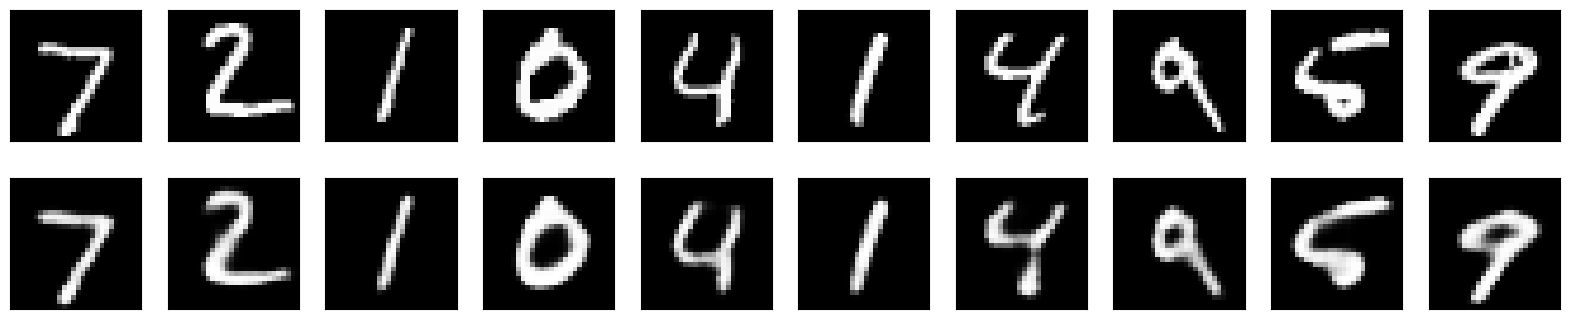

In [ ]:
# autoencoder_conv.load_weights("autoencoder_conv.h5")
predictions = autoencoder_conv.predict(x_test_img)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **Denoising AE**

For denoising AE, we will use the Convolutional AE trained on noisy samples.

### **Load data**

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

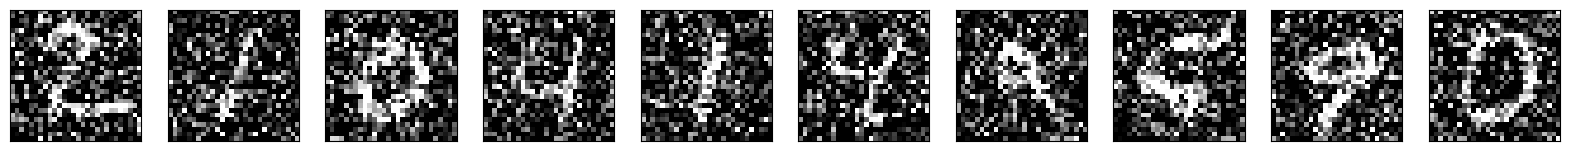

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Model**

In [ ]:
autoencoder_denoising = get_conv_ae()

autoencoder_denoising.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 8)           584 

### **Train**

In [ ]:
autosave = ModelCheckpoint("autoencoder_denoising.h5",
                           mode="min",
                           save_best_only=True,
                           monitor="val_loss",
                           verbose=1)

early_stop = EarlyStopping(patience=10,
                           verbose=1,
                           mode="min",
                           monitor="val_loss",
                           restore_best_weights=True)

In [ ]:
autoencoder_denoising.fit(x_train_noisy, x_train,
                          epochs=100,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test),
                          callbacks=[autosave, early_stop])

Epoch 1/100
460/469 [============================>.] - ETA: 0s - loss: 0.2533
Epoch 1: val_loss improved from inf to 0.18843, saving model to autoencoder_denoising.h5
469/469 [==============================] - 5s 7ms/step - loss: 0.2521 - val_loss: 0.1884
Epoch 2/100
 20/469 [>.............................] - ETA: 2s - loss: 0.1887

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


464/469 [============================>.] - ETA: 0s - loss: 0.1761
Epoch 2: val_loss improved from 0.18843 to 0.16549, saving model to autoencoder_denoising.h5
469/469 [==============================] - 4s 8ms/step - loss: 0.1759 - val_loss: 0.1655
Epoch 3/100
464/469 [============================>.] - ETA: 0s - loss: 0.1603
Epoch 3: val_loss improved from 0.16549 to 0.15488, saving model to autoencoder_denoising.h5
469/469 [==============================] - 4s 8ms/step - loss: 0.1603 - val_loss: 0.1549
Epoch 4/100
461/469 [============================>.] - ETA: 0s - loss: 0.1525
Epoch 4: val_loss improved from 0.15488 to 0.14796, saving model to autoencoder_denoising.h5
469/469 [==============================] - 3s 6ms/step - loss: 0.1524 - val_loss: 0.1480
Epoch 5/100
463/469 [============================>.] - ETA: 0s - loss: 0.1471
Epoch 5: val_loss improved from 0.14796 to 0.14314, saving model to autoencoder_denoising.h5
469/469 [==============================] - 3s 7ms/step - loss

### **Prediction**

313/313 [==============================] - 1s 2ms/step


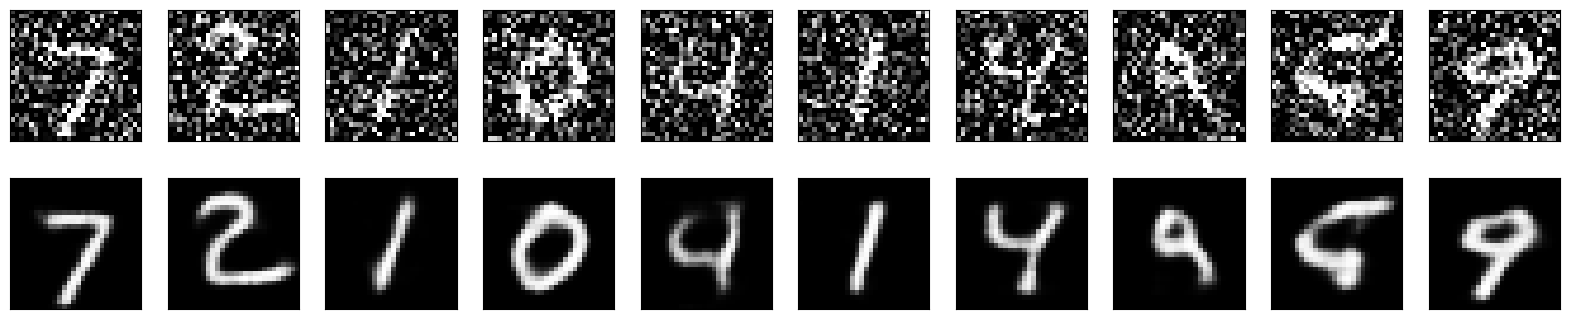

In [ ]:
# autoencoder_denoising.load_weights("autoencoder_denoising.h5")
predictions = autoencoder_denoising.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **Variational AE (VAE)**

VAE implementation is in the `models_vae.py` file.

### **Load data**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### **Model**

**Encoder**

In [ ]:
encoder = get_vae_encoder(latent_dim=2)

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_16 (Conv2D)          (None, 14, 14, 32)           320       ['input_17[0][0]']            
                                                                                                  
 conv2d_17 (Conv2D)          (None, 7, 7, 64)             18496     ['conv2d_16[0][0]']           
                                                                                                  
 flatten_8 (Flatten)         (None, 3136)                 0         ['conv2d_17[0][0]']           
                                                                                            

**Decoder**

In [ ]:
decoder = get_vae_decoder(latent_dim=2)

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_17 (Dense)            (None, 3136)              9408      
                                                                 
 reshape_8 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_24 (Conv2  (None, 14, 14, 64)        36928     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_25 (Conv2  (None, 28, 28, 32)        18464     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_26 (Conv2  (None, 28, 28, 1)         289 

### **Train**

In [ ]:
vae = VAE(encoder, decoder)
vae.compile(optimizer="adam")

vae.fit(x_train,
        epochs=50,
        batch_size=128)

Epoch 1/50
469/469 [==============================] - 7s 10ms/step - loss: 269.9272 - reconstruction_loss: 216.5759 - kl_loss: 2.4786
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 188.4504 - reconstruction_loss: 178.1271 - kl_loss: 5.2140
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 172.8214 - reconstruction_loss: 165.5480 - kl_loss: 5.6503
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 167.2353 - reconstruction_loss: 160.2225 - kl_loss: 6.1022
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 164.4125 - reconstruction_loss: 157.1626 - kl_loss: 6.3274
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 161.8224 - reconstruction_loss: 155.2186 - kl_loss: 6.4571
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 160.2079 - reconstruction_loss: 153.7386 - kl_loss: 6.5138
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - 

### **Prediction**

(1, 28, 28, 1)


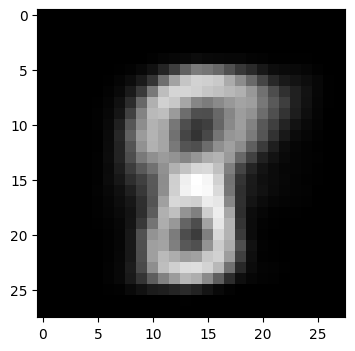

In [ ]:
x_rand = 0.34
y_rand = -0.59

x_generated = vae.decoder.predict(np.array([[x_rand, y_rand]]), verbose=0)
print(x_generated.shape)

plt.figure(figsize=(4, 4))
plt.imshow(x_generated[0].reshape(28, 28), cmap="gray")
plt.show()

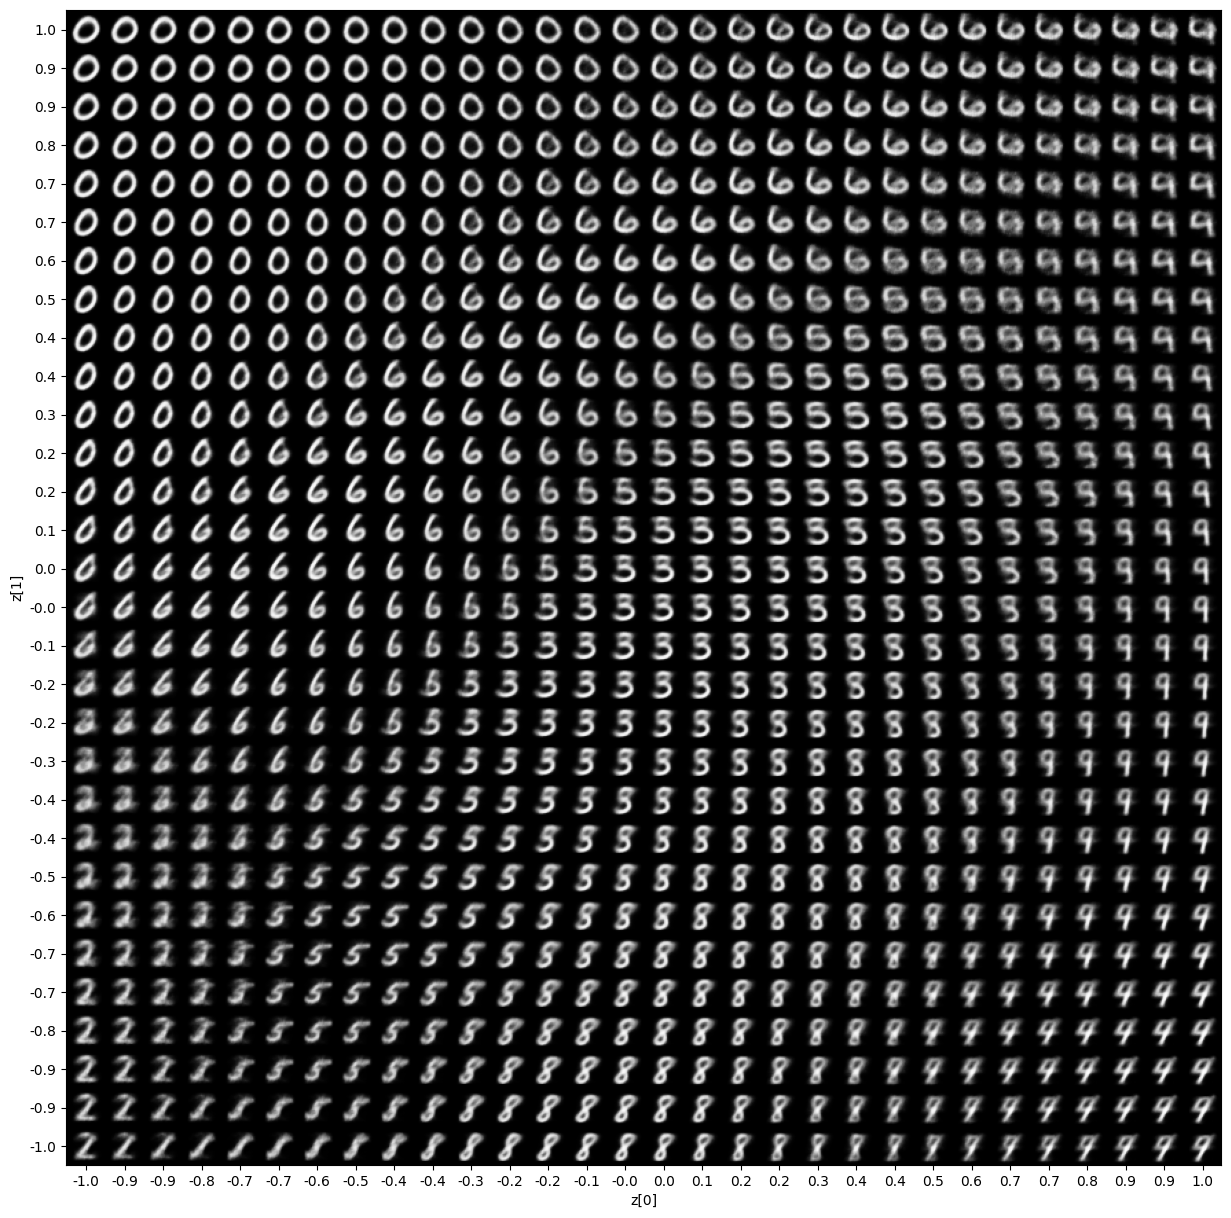

In [ ]:
def plot_latent_space(vae, n=30, figsize=15):
  # display a n*n 2D manifold of digits
  digit_size = 28
  scale = 1.0
  figure = np.zeros((digit_size * n, digit_size * n))
  # linearly spaced coordinates corresponding to the 2D plot
  # of digit classes in the latent space
  grid_x = np.linspace(-scale, scale, n)
  grid_y = np.linspace(-scale, scale, n)[::-1]

  for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
      z_sample = np.array([[xi, yi]])
      x_decoded = vae.decoder.predict(z_sample, verbose=0)
      digit = x_decoded[0].reshape(digit_size, digit_size)
      figure[
          i * digit_size : (i + 1) * digit_size,
          j * digit_size : (j + 1) * digit_size,
      ] = digit

  plt.figure(figsize=(figsize, figsize))
  start_range = digit_size // 2
  end_range = n * digit_size + start_range
  pixel_range = np.arange(start_range, end_range, digit_size)
  sample_range_x = np.round(grid_x, 1)
  sample_range_y = np.round(grid_y, 1)
  plt.xticks(pixel_range, sample_range_x)
  plt.yticks(pixel_range, sample_range_y)
  plt.xlabel("z[0]")
  plt.ylabel("z[1]")
  plt.imshow(figure, cmap="Greys_r")
  plt.show()


plot_latent_space(vae)

# **Generative Adversarial Networks (GANs)**

Code based on the [Keras-GAN](https://github.com/eriklindernoren/Keras-GAN) repository.

- GAN: implementation in the `model_gan.py` file.
- cGAN: implementation in the `model_cgans.py` file.
- pix2pix: implementation in the `model_pix2pix.py` file.

## **GANs**

Generative Adversarial Network trained on MNIST dataset.

See the implementation of the `GAN` class in the file `models_gan.py`

### **Train**

In [ ]:
gan = GAN()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533505 (2.04 MB)
Trainable params: 533505 

In [ ]:
gan.train(epochs=30000, batch_size=32, sample_interval=200)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 512)               401920    
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_43 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_44 (Dense)            (None, 1)                 257       
                                                                 
Total params: 533505 (2.04 MB)
Trainable params: 5335

In [ ]:
gan.combined.save("gan.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Prediction**

In [ ]:
gan.combined.load_weights("gan.h5")

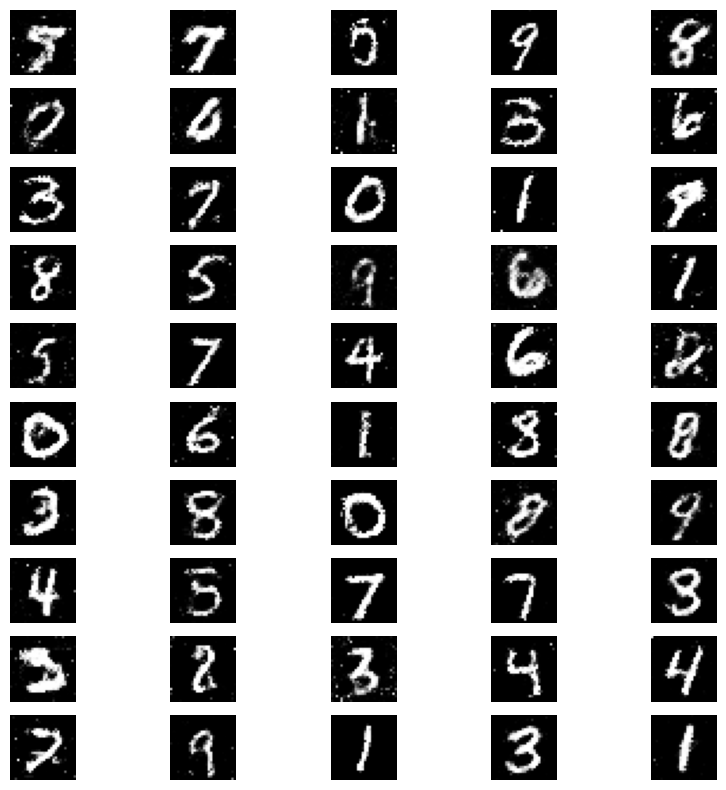

In [ ]:
rows = 10
cols = 5

noise = np.random.normal(0, 1, (rows*cols, 100))

gen_imgs = gan.generator.predict(noise, verbose=0)

plt.figure(figsize=(10, 10))
for i in range(rows*cols):
  plt.subplot(rows, cols, i+1)
  plt.imshow(gen_imgs[i].reshape(28, 28), cmap="gray")
  plt.axis("off")
plt.show()

## **cGANs**

Conditional Generative Adversarial Network trained on MNIST dataset.

See the implementation of the `cGAN` class in the file `models_cgan.py`

### **Train**

In [ ]:
cgan = CGAN()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)              

In [ ]:
cgan.train(epochs=30000, batch_size=32, sample_interval=200)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 512)               0

In [ ]:
cgan.combined.save("cgan.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Prediction**

In [ ]:
cgan.combined.load_weights("cgan.h5")

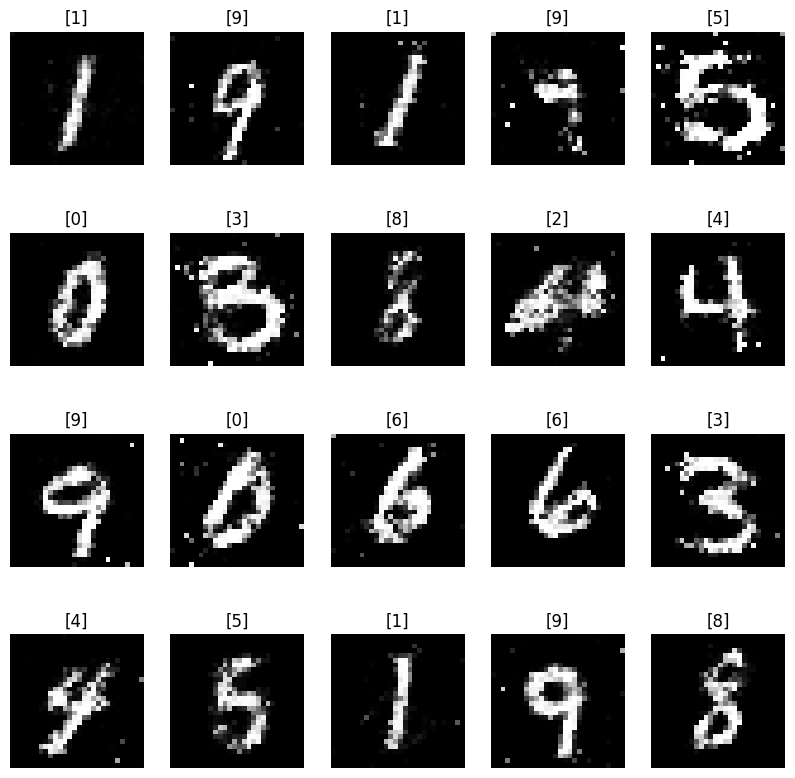

In [ ]:
rows = 4
cols = 5

# Now, we need noise and the expected label (used as condition)
# to generate a new sample
noise = np.random.normal(0, 1, (rows*cols, 100))
sampled_labels = np.array(random.choices(range(10), k=rows*cols)).reshape(-1,1)

gen_imgs = cgan.generator.predict([noise,sampled_labels], verbose=0)

plt.figure(figsize=(10, 10))
for i in range(rows*cols):
  plt.subplot(rows, cols, i+1)
  plt.imshow(gen_imgs[i].reshape(28, 28), cmap="gray")
  plt.title(sampled_labels[i])
  plt.axis("off")
plt.show()

## **pix2pix**

pix2pix: Image-to-Image translation with Conditional Adversarial Nets trained on the facades dataset.

See the implementation of the `Pix2Pix` class in the file `models_pix2pix.py`

The following command will download the dataset. It works only for linux.

For windows, you can download the dataset form the following link: [facades dataset](https://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz)

In [ ]:
!bash download_dataset.sh facades

https://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
--2024-07-11 09:43:20--  https://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘./.tar.gz’

./.tar.gz           100%[===================>]  28.77M  9.42MB/s    in 3.1s    

2024-07-11 09:43:24 (9.42 MB/s) - ‘./.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/te

### **Train**

In [ ]:
gan_p = Pix2Pix()

In [ ]:
gan_p.train(epochs=100, batch_size=1, sample_interval=100)

[Epoch 0/100] [D loss: 0.144612, acc:  83%] [G loss: 45.048870] time: 0:01:39.108494
[Epoch 1/100] [D loss: 0.075914, acc:  94%] [G loss: 44.455921] time: 0:03:13.252161
[Epoch 2/100] [D loss: 0.027973, acc: 100%] [G loss: 43.764084] time: 0:04:45.497122
[Epoch 3/100] [D loss: 0.037089, acc:  98%] [G loss: 43.601665] time: 0:06:18.571212
[Epoch 4/100] [D loss: 0.013677, acc: 100%] [G loss: 45.015739] time: 0:07:49.935718
[Epoch 5/100] [D loss: 0.032863, acc: 100%] [G loss: 45.273571] time: 0:09:23.936910
[Epoch 6/100] [D loss: 0.020478, acc: 100%] [G loss: 44.389561] time: 0:10:55.801773
[Epoch 7/100] [D loss: 0.010964, acc: 100%] [G loss: 44.074383] time: 0:12:29.017474
[Epoch 8/100] [D loss: 0.010186, acc: 100%] [G loss: 45.454380] time: 0:14:00.011220
[Epoch 9/100] [D loss: 0.007044, acc: 100%] [G loss: 45.051270] time: 0:15:34.397680
[Epoch 10/100] [D loss: 0.028345, acc: 100%] [G loss: 46.168827] time: 0:17:05.017853
[Epoch 11/100] [D loss: 0.014885, acc: 100%] [G loss: 43.805542]

In [ ]:
gan_p.combined.save("gan_p.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
